In [70]:
import tpqoa
api = tpqoa.tpqoa('pyalgo.cfg')

In [17]:
api.get_instruments()[:15]

[('AUD/CAD', 'AUD_CAD'),
 ('AUD/CHF', 'AUD_CHF'),
 ('AUD/HKD', 'AUD_HKD'),
 ('AUD/JPY', 'AUD_JPY'),
 ('AUD/NZD', 'AUD_NZD'),
 ('AUD/SGD', 'AUD_SGD'),
 ('AUD/USD', 'AUD_USD'),
 ('Australia 200', 'AU200_AUD'),
 ('Bitcoin', 'BTC_USD'),
 ('Bitcoin Cash', 'BCH_USD'),
 ('Brent Crude Oil', 'BCO_USD'),
 ('Bund', 'DE10YB_EUR'),
 ('CAD/CHF', 'CAD_CHF'),
 ('CAD/HKD', 'CAD_HKD'),
 ('CAD/JPY', 'CAD_JPY')]

In [18]:
help(api.get_history)

Help on method get_history in module tpqoa.tpqoa:

get_history(instrument, start, end, granularity, price, localize=True) method of tpqoa.tpqoa.tpqoa instance
    Retrieves historical data for instrument.

    Parameters
    instrument: string
        valid instrument name
    start, end: datetime, str
        Python datetime or string objects for start and end
    granularity: string
        a string like 'S5', 'M1' or 'D'
    price: string
        one of 'A' (ask), 'B' (bid) or 'M' (middle)

    Returns
    data: pd.DataFrame
        pandas DataFrame object with data



In [19]:
instrument = 'EUR_USD'  
start = '2020-08-10'  
end = '2020-08-12'  
granularity = 'M1'  
price = 'M'

In [20]:
data = api.get_history(instrument, start, end, granularity, price)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2814 entries, 2020-08-10 00:00:00 to 2020-08-11 23:59:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   o         2814 non-null   float64
 1   h         2814 non-null   float64
 2   l         2814 non-null   float64
 3   c         2814 non-null   float64
 4   volume    2814 non-null   int64  
 5   complete  2814 non-null   bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 134.7 KB


In [21]:
data[['c', 'volume']].head()

,c,volume
time,,
2020-08-10 00:00:00,1.17822,18
2020-08-10 00:01:00,1.17836,32
2020-08-10 00:02:00,1.17828,25
2020-08-10 00:03:00,1.17834,13
2020-08-10 00:04:00,1.17847,43


In [22]:
import numpy as np
data['returns'] = np.log(data['c'] / data['c'].shift(1))
cols = []
for momentum in [15,30,60,120]:
    col = 'position_{}'.format(momentum)  
    data[col] = np.sign(data['returns'].rolling(momentum).mean())  
    cols.append(col)

In [23]:
data.head()

,o,h,l,c,volume,complete,returns,position_15,position_30,position_60,position_120
time,,,,,,,,,,,
2020-08-10 00:00:00,1.17814,1.17822,1.17814,1.17822,18,True,NaN,NaN,NaN,NaN,NaN
2020-08-10 00:01:00,1.17823,1.17841,1.17822,1.17836,32,True,0.000119,NaN,NaN,NaN,NaN
2020-08-10 00:02:00,1.17834,1.17834,1.17826,1.17828,25,True,-0.000068,NaN,NaN,NaN,NaN
2020-08-10 00:03:00,1.17827,1.17834,1.17827,1.17834,13,True,0.000051,NaN,NaN,NaN,NaN
2020-08-10 00:04:00,1.17836,1.17852,1.17836,1.17847,43,True,0.000110,NaN,NaN,NaN,NaN


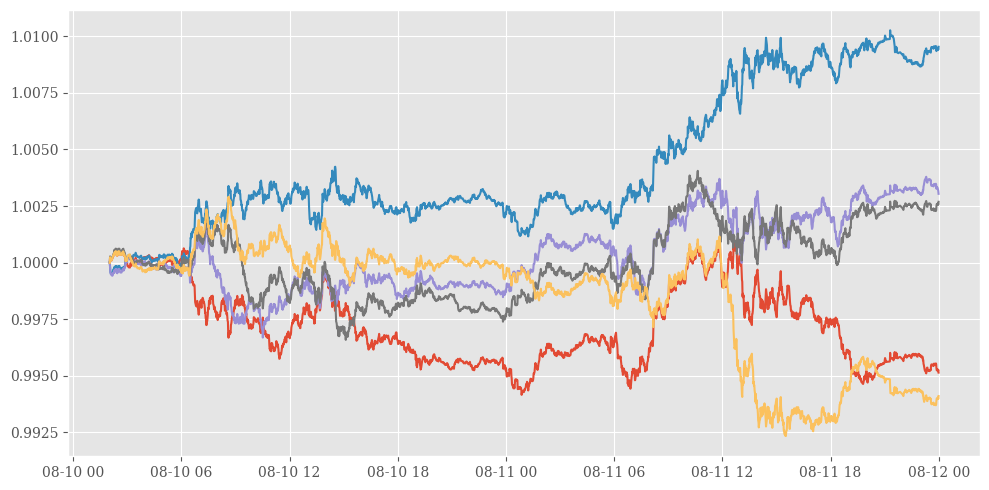

In [24]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

strats = ['returns']
for col in cols:  
     strat = 'strategy_{}'.format(col.split('_')[1])  
     data[strat] = data[col].shift(1) * data['returns']  
     strats.append(strat)

# fig, ax = plt.subplots(figsize=(12, 6))
plt.figure(figsize=(10, 5))
plt.plot(data[strats].dropna().cumsum().apply(np.exp))
# data[strats].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))
plt.grid(True)
plt.tight_layout()
plt.show()

# Margin 20:1

plt.figure(figsize=(10, 5))
plt.plot(data[strats].dropna().cumsum().apply(lambda x: x*20).apply(np.exp))
#plt.grid(True)
plt.tight_layout()
plt.show()

# Work with Streaming data

In [67]:
api.stream_data(instrument, stop=10)

2025-04-21T14:30:56.581483056Z 1.15124 1.15133
2025-04-21T14:30:57.671626965Z 1.15119 1.15129
2025-04-21T14:30:58.492738207Z 1.1512 1.15129
2025-04-21T14:30:58.659976055Z 1.15118 1.15127
2025-04-21T14:30:59.069282546Z 1.15111 1.15121
2025-04-21T14:30:59.394725629Z 1.15111 1.15122
2025-04-21T14:30:59.630270312Z 1.15114 1.15123
2025-04-21T14:31:00.391585062Z 1.15113 1.15123
2025-04-21T14:31:01.408877588Z 1.15113 1.15123
2025-04-21T14:31:01.947482670Z 1.15114 1.15123


In [26]:
help(api.stream_data)

Help on method stream_data in module tpqoa.tpqoa:

stream_data(instrument, stop=None, ret=False, callback=None) method of tpqoa.tpqoa.tpqoa instance
    Starts a real-time data stream.

    Parameters
    instrument: string
        valid instrument name



# Test command

In [27]:
# Opens a long position via market order.
api.create_order(instrument, 1000)



 {'id': '25', 'time': '2025-04-21T11:39:49.019670345Z', 'userID': 31516200, 'accountID': '101-011-31516200-001', 'batchID': '24', 'requestID': '79377642650380580', 'type': 'ORDER_FILL', 'orderID': '24', 'instrument': 'EUR_USD', 'units': '1000.0', 'gainQuoteHomeConversionFactor': '1.549072127105', 'lossQuoteHomeConversionFactor': '1.564640691196', 'price': 1.15371, 'fullVWAP': 1.15371, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.15359, 'liquidity': '500000'}, {'price': 1.15358, 'liquidity': '2500000'}, {'price': 1.15357, 'liquidity': '2000000'}, {'price': 1.15356, 'liquidity': '5000000'}, {'price': 1.15353, 'liquidity': '10000000'}, {'price': 1.1535, 'liquidity': '10000000'}], 'asks': [{'price': 1.15371, 'liquidity': '500000'}, {'price': 1.15372, 'liquidity': '500000'}, {'price': 1.15373, 'liquidity': '2000000'}, {'price': 1.15374, 'liquidity': '2000000'}, {'price': 1.15375, 'liquidity': '5000000'}, {'price': 1.15377, 'liquidity': '10000000'}, {'price': 1.1538, 'liquidity': '1

# Implementing Trading Strategies in Real Time

In [28]:
import tpqoa
import numpy as np
import pandas as pd


class MomentumTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, momentum, units,
                 *args, **kwargs):
        super(MomentumTrader, self).__init__(conf_file)
        self.position = 0  
        self.instrument = instrument  
        self.momentum = momentum  
        self.bar_length = bar_length  # Length of the bar for the resampling of the tick data.
        self.units = units  # Number of units to be traded
        self.raw_data = pd.DataFrame()  # An empty DataFrame object to be filled with tick data
        self.min_length = self.momentum + 1  # The initial minimum bar length for the start of the trading itself

    # This method is called whenever new tick data arrives.
    def on_success(self, time, bid, ask):  
        ''' Takes actions when new tick data arrives. '''
        print(self.ticks, end=' ')   # The number of ticks retrieved is printed.
        self.raw_data = pd.concat([self.raw_data, pd.DataFrame(
            {'bid': bid, 'ask': ask}, index=[pd.Timestamp(time)])])
        self.data = self.raw_data.resample(
            self.bar_length, label='right').last().ffill().iloc[:-1]  # The tick data is then resampled to the appropriate bar length.
        self.data['mid'] = self.data.mean(axis=1)  
        self.data['returns'] = np.log(self.data['mid'] /
                                      self.data['mid'].shift(1))  
        self.data['position'] = np.sign(
            self.data['returns'].rolling(self.momentum).mean())  

        if len(self.data) > self.min_length:  
            self.min_length += 1  
            if self.data['position'].iloc[-1] == 1:  
                if self.position == 0:  
                    self.create_order(self.instrument, self.units)  
                elif self.position == -1:  
                    self.create_order(self.instrument, self.units * 2)  # Convert to position=1
                self.position = 1  
            elif self.data['position'].iloc[-1] == -1:  
                if self.position == 0:  
                    self.create_order(self.instrument, -self.units)  
                elif self.position == 1:  
                    self.create_order(self.instrument, -self.units * 2)  
                self.position = -1  

In [29]:
mt = MomentumTrader('pyalgo.cfg',  
                        instrument=instrument,  
                        bar_length='10s',  
                        momentum=6,  
                        units=10000)

In [30]:
mt.stream_data(mt.instrument, stop=10)

1 2 3 4 5 6 7 8 9 10 

In [31]:
# Finally, close out the final position:
# ret=True: Yêu cầu hàm trả về kết quả order dưới dạng dictionary (dict) thay vì in ra màn hình
# suppress=True: Không in thông tin order ra màn hình
oo = mt.create_order(instrument, units=-mt.position * mt.units,
                              ret=True, suppress=True)  
oo

{'id': '26',
 'time': '2025-04-21T11:40:05.091811937Z',
 'userID': 31516200,
 'accountID': '101-011-31516200-001',
 'batchID': '26',
 'requestID': '115406439739274924',
 'type': 'MARKET_ORDER_REJECT',
 'instrument': 'EUR_USD',
 'units': '0.0',
 'timeInForce': 'FOK',
 'positionFill': 'DEFAULT',
 'reason': 'CLIENT_ORDER',
 'rejectReason': 'UNITS_INVALID'}

In [32]:
api.get_account_summary()

{'id': '101-011-31516200-001',
 'alias': 'Primary',
 'currency': 'AUD',
 'balance': '99984.3947',
 'createdByUserID': 31516200,
 'createdTime': '2025-04-15T12:18:10.567088986Z',
 'guaranteedStopLossOrderMode': 'ALLOWED',
 'pl': '-15.3146',
 'resettablePL': '-15.3146',
 'resettablePLTime': '0',
 'financing': '-0.2907',
 'commission': '0.0',
 'guaranteedExecutionFees': '0.0',
 'marginRate': '0.02',
 'openTradeCount': 3,
 'openPositionCount': 1,
 'pendingOrderCount': 0,
 'hedgingEnabled': False,
 'unrealizedPL': '32.1239',
 'NAV': '100016.5186',
 'marginUsed': '179.4154',
 'marginAvailable': '99837.487',
 'positionValue': '5387.85',
 'marginCloseoutUnrealizedPL': '32.5077',
 'marginCloseoutNAV': '100016.9024',
 'marginCloseoutMarginUsed': '179.4154',
 'marginCloseoutPercent': '0.0009',
 'marginCloseoutPositionValue': '5387.85',
 'withdrawalLimit': '99837.487',
 'marginCallMarginUsed': '179.4154',
 'marginCallPercent': '0.00179',
 'lastTransactionID': '26'}

In [33]:
api.get_transactions(tid=int(oo['id']) - 2)

[{'id': '25',
  'time': '2025-04-21T11:39:49.019670345Z',
  'userID': 31516200,
  'accountID': '101-011-31516200-001',
  'batchID': '24',
  'requestID': '79377642650380580',
  'type': 'ORDER_FILL',
  'orderID': '24',
  'instrument': 'EUR_USD',
  'units': '1000.0',
  'gainQuoteHomeConversionFactor': '1.549072127105',
  'lossQuoteHomeConversionFactor': '1.564640691196',
  'price': 1.15371,
  'fullVWAP': 1.15371,
  'fullPrice': {'type': 'PRICE',
   'bids': [{'price': 1.15359, 'liquidity': '500000'},
    {'price': 1.15358, 'liquidity': '2500000'},
    {'price': 1.15357, 'liquidity': '2000000'},
    {'price': 1.15356, 'liquidity': '5000000'},
    {'price': 1.15353, 'liquidity': '10000000'},
    {'price': 1.1535, 'liquidity': '10000000'}],
   'asks': [{'price': 1.15371, 'liquidity': '500000'},
    {'price': 1.15372, 'liquidity': '500000'},
    {'price': 1.15373, 'liquidity': '2000000'},
    {'price': 1.15374, 'liquidity': '2000000'},
    {'price': 1.15375, 'liquidity': '5000000'},
    {'pric

In [34]:
help(api.create_order)

Help on method create_order in module tpqoa.tpqoa:

create_order(instrument, units, price=None, sl_distance=None, tsl_distance=None, tp_price=None, comment=None, touch=False, suppress=False, ret=False) method of tpqoa.tpqoa.tpqoa instance
    Places order with Oanda.

    Parameters
    instrument: string
        valid instrument name
    units: int
        number of units of instrument to be bought
        (positive int, eg 'units=50')
        or to be sold (negative int, eg 'units=-100')
    price: float
        limit order price, touch order price
    sl_distance: float
        stop loss distance price, mandatory eg in Germany
    tsl_distance: float
        trailing stop loss distance
    tp_price: float
        take profit price to be used for the trade
    comment: str
        string
    touch: boolean
        market_if_touched order (requires price to be set)
    suppress: boolean
        whether to suppress print out
    ret: boolean
        whether to return the order object



In [35]:
api.print_transactions(tid=int(oo['id']) - 10)

  23 | 2025-04-21T11:38:18.52 | EUR_USD |   1000.0 |      0.0
  25 | 2025-04-21T11:39:49.01 | EUR_USD |   1000.0 |      0.0


# Archive Code

In [36]:
# price = mt.get_quote(instrument)
# print("Giá hiện tại (mid):", price)

quote = mt.get_prices(instrument)
bid = quote[1]
ask = quote[2]
mid = (bid + ask) / 2
print("Bid:", bid, "Ask:", ask, "Mid:", mid)

"""
mt.create_order(instrument=instrument,
                units=1000,
                order_type='LMT',
                price=1.1305,  # GIÁ mong muốn
                ret=True) 
"""

Bid: 1.15341 Ask: 1.1537 Mid: 1.1535549999999999


"\nmt.create_order(instrument=instrument,\n                units=1000,\n                order_type='LMT',\n                price=1.1305,  # GIÁ mong muốn\n                ret=True) \n"

In [37]:
help(api.get_prices)

Help on method get_prices in module tpqoa.tpqoa:

get_prices(instrument) method of tpqoa.tpqoa.tpqoa instance
    Returns the current BID/ASK prices for instrument.



In [38]:
quote

('2025-04-21T11:40:06.144871334Z', 1.15341, 1.1537)

# ML-Based Trading Strategy

In [39]:
import tpqoa
import pandas as pd
import numpy as np

api = tpqoa.tpqoa('pyalgo.cfg')

In [40]:
# Connects to the API and retrieves the data
instrument = 'EUR_USD'
raw = api.get_history(instrument,
                        start='2024-06-08',
                        end='2024-06-13',
                        granularity='M10', # 10 minutes 
                        price='M')
raw.tail()

,o,h,l,c,volume,complete
time,,,,,,
2024-06-12 23:10:00,1.08128,1.08146,1.08126,1.08143,206,True
2024-06-12 23:20:00,1.08144,1.08152,1.08142,1.08143,194,True
2024-06-12 23:30:00,1.08144,1.08149,1.08136,1.08136,175,True
2024-06-12 23:40:00,1.08138,1.08149,1.08131,1.08146,142,True
2024-06-12 23:50:00,1.08146,1.08150,1.08126,1.08128,219,True


In [41]:
# Specifies the average bid-ask spread.
spread = 0.00012
mean = raw['c'].mean()

# Calculates the average proportional transactions costs given the average spread and the average mid closing price
ptc = spread / mean
ptc

np.float64(0.00011148796566897393)

In [42]:
data = pd.DataFrame(raw['c'])
data.columns = [instrument,]
window = 20
data['return'] = np.log(data / data.shift(1))
data['vol'] = data['return'].rolling(window).std()
data['mom'] = np.sign(data['return'].rolling(window).mean())
data['sma'] = data[instrument].rolling(window).mean()
data['min'] = data[instrument].rolling(window).min()
data['max'] = data[instrument].rolling(window).max()

# Remove NaN
data.dropna(inplace=True)

# Adds the lagged features data to the DataFrame object. 
lags = 6
features = ['return', 'vol', 'mom', 'sma', 'min', 'max']
cols = []
for f in features:
    for lag in range(1, lags + 1):
        col = f'{f}_lag_{lag}'
        data[col] = data[f].shift(lag)
        cols.append(col)

data.dropna(inplace=True)

data['direction'] = np.where(data['return'] > 0, 1, -1)
data[cols].iloc[:lags, ]

,return_lag_1,return_lag_2,return_lag_3,return_lag_4,return_lag_5,return_lag_6,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,...,min_lag_3,min_lag_4,min_lag_5,min_lag_6,max_lag_1,max_lag_2,max_lag_3,max_lag_4,max_lag_5,max_lag_6
time,,,,,,,,,,,,,,,,,,,,,
2024-06-10 01:20:00,0.000158,-0.000093,0.000093,0.000093,0.000102,-0.000167,0.000254,0.000272,0.000281,0.000280,...,1.07658,1.07658,1.07658,1.07658,1.078,1.078,1.078,1.078,1.078,1.078
2024-06-10 01:30:00,-0.000585,0.000158,-0.000093,0.000093,0.000093,0.000102,0.000288,0.000254,0.000272,0.000281,...,1.07658,1.07658,1.07658,1.07658,1.078,1.078,1.078,1.078,1.078,1.078
2024-06-10 01:40:00,0.000186,-0.000585,0.000158,-0.000093,0.000093,0.000093,0.000233,0.000288,0.000254,0.000272,...,1.07658,1.07658,1.07658,1.07658,1.078,1.078,1.078,1.078,1.078,1.078
2024-06-10 01:50:00,-0.000009,0.000186,-0.000585,0.000158,-0.000093,0.000093,0.000214,0.000233,0.000288,0.000254,...,1.07658,1.07658,1.07658,1.07658,1.078,1.078,1.078,1.078,1.078,1.078
2024-06-10 02:00:00,0.000028,-0.000009,0.000186,-0.000585,0.000158,-0.000093,0.000209,0.000214,0.000233,0.000288,...,1.07704,1.07658,1.07658,1.07658,1.078,1.078,1.078,1.078,1.078,1.078
2024-06-10 02:10:00,-0.000251,0.000028,-0.000009,0.000186,-0.000585,0.000158,0.000199,0.000209,0.000214,0.000233,...,1.07724,1.07704,1.07658,1.07658,1.078,1.078,1.078,1.078,1.078,1.078


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [65]:
# Specifies major parameters for the ML algorithm
n_estimators=15
random_state=100
max_depth=2
min_samples_leaf=15
subsample=0.33

dtc = DecisionTreeClassifier(random_state=random_state,
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf)

# Declare model
model = AdaBoostClassifier(estimator=dtc,
                               n_estimators=n_estimators,
                               random_state=random_state)

# Construct data
split = int(len(data) * 0.7)
train = data.iloc[:split].copy()
# Applies Gaussian normalization
mu, std = train.mean(), train.std()
train_ = (train - mu) / std

# Fit the model
model.fit(train_[cols], train['direction'])

accuracy_score(train['direction'], model.predict(train_[cols]))

0.8040540540540541

In [45]:
# Check the test data
test = data.iloc[split:].copy()
test_ = (test - mu) / std

test['position'] = model.predict(test_[cols])
accuracy_score(test['direction'], test['position'])

0.5703125

In [46]:
test.head()

,EUR_USD,return,vol,mom,sma,min,max,return_lag_1,return_lag_2,return_lag_3,...,min_lag_5,min_lag_6,max_lag_1,max_lag_2,max_lag_3,max_lag_4,max_lag_5,max_lag_6,direction,position
time,,,,,,,,,,,,,,,,,,,,,
2024-06-12 02:40:00,1.07412,0.000000,0.000092,1.0,1.073878,1.07354,1.07416,-0.000037,0.000093,0.000037,...,1.07354,1.07354,1.07416,1.07416,1.07406,1.07410,1.07411,1.07411,-1,-1
2024-06-12 02:50:00,1.07421,0.000084,0.000094,1.0,1.073890,1.07354,1.07421,0.000000,-0.000037,0.000093,...,1.07354,1.07354,1.07416,1.07416,1.07416,1.07406,1.07410,1.07411,1,1
2024-06-12 03:00:00,1.07416,-0.000047,0.000094,1.0,1.073901,1.07354,1.07421,0.000084,0.000000,-0.000037,...,1.07354,1.07354,1.07421,1.07416,1.07416,1.07416,1.07406,1.07410,-1,-1
2024-06-12 03:10:00,1.07416,0.000000,0.000093,1.0,1.073909,1.07354,1.07421,-0.000047,0.000084,0.000000,...,1.07354,1.07354,1.07421,1.07421,1.07416,1.07416,1.07416,1.07406,-1,1
2024-06-12 03:20:00,1.07416,0.000000,0.000080,1.0,1.073927,1.07354,1.07421,0.000000,-0.000047,0.000084,...,1.07354,1.07354,1.07421,1.07421,1.07421,1.07416,1.07416,1.07416,-1,-1


<Axes: xlabel='time'>

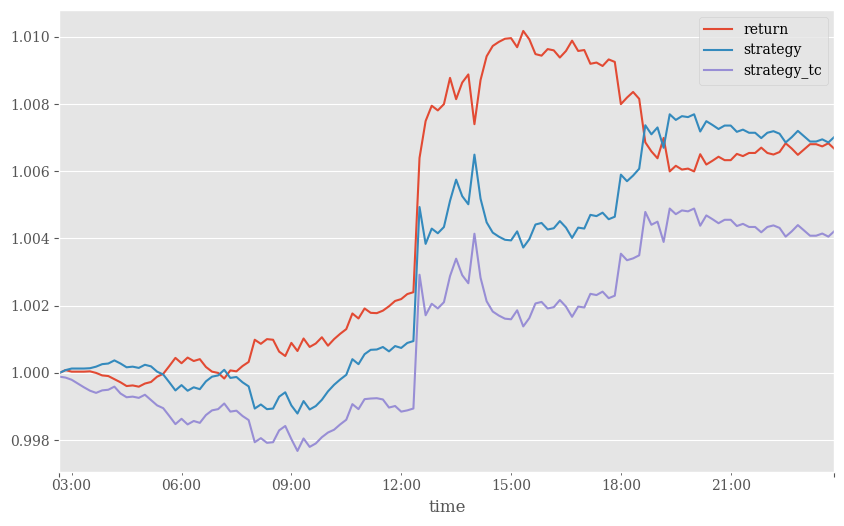

In [47]:
# Check the performance if take into account the proportional transaction cost
test['strategy'] = test['position'] * test['return']
test['strategy_tc'] = np.where(test['position'].diff() != 0,
                                        test['strategy'] - ptc,  
                                        test['strategy'])
test[['return', 'strategy', 'strategy_tc']].cumsum(
                 ).apply(np.exp).plot(figsize=(10, 6))

# Compute VaR based on Empirical distribution

In [49]:
for lev in [10, 20, 30, 40, 50]:
     label = 'lstrategy_tc_%d' % lev
     test[label] = test['strategy_tc'] * lev  

equity = 3333
risk = pd.DataFrame(test['lstrategy_tc_30'])
risk['equity'] = risk['lstrategy_tc_30'].cumsum().apply(np.exp) * equity

Confidence Level    Value-at-Risk
---------------------------------
           99.99          130.081
           99.90          128.942
           99.00          106.703
           97.50           65.010
           95.00           48.578
           90.00           27.251


# VaR for 10 minutes

In [54]:
import scipy.stats as scs
percs = [0.01, 0.1, 1., 2.5, 5., 10.]
risk['return'] = np.log(risk['equity'] / risk['equity'].shift(1))
VaR = scs.scoreatpercentile(equity * risk['return'], percs)

def print_var():
    print('{}    {}'.format('Confidence Level', 'Value-at-Risk'))
    print(33 * '-')
    for pair in zip(percs, VaR):
        print('{:16.2f} {:16.3f}'.format(100 - pair[0], -pair[1]))

print_var()

Confidence Level    Value-at-Risk
---------------------------------
           99.99          130.081
           99.90          128.942
           99.00          106.703
           97.50           65.010
           95.00           48.578
           90.00           27.251


In [55]:
VaR

array([-130.08131799, -128.94157288, -106.70303811,  -65.01044045,
        -48.57840634,  -27.25126837])

# VaR for 1 hour

In [56]:
# Resamples the data from 10-minute to 1-hour bars
hourly = risk.resample('1h', label='right').last()
hourly['return'] = np.log(hourly['equity'] /hourly['equity'].shift(1))
VaR = scs.scoreatpercentile(equity * hourly['return'], percs)
print_var()

Confidence Level    Value-at-Risk
---------------------------------
           99.99          105.077
           99.90          104.567
           99.00           99.470
           97.50           90.975
           95.00           76.159
           90.00           37.946


In [53]:
VaR

array([-105.07660299, -104.56688899,  -99.46974901,  -90.9745157 ,
        -76.1586026 ,  -37.94578398])

# Save Model

In [57]:
import pickle
algorithm = {'model': model, 'mu': mu, 'std': std}
pickle.dump(algorithm, open('algorithm.pkl', 'wb'))

In [63]:
algorithm = pickle.load(open('algorithm.pkl', 'rb'))
algorithm['model']

DecisionTreeClassifier(max_depth=2, min_samples_leaf=15, random_state=186422792)

In [66]:
model

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    min_samples_leaf=15,
                                                    random_state=100),
                   n_estimators=15, random_state=100)

In [73]:
class MLTrader(tpqoa.tpqoa):
    def __init__(self, config_file, algorithm):
        super(MLTrader, self).__init__(config_file)
        self.model = algorithm['model']  
        self.mu = algorithm['mu'] 
        self.std = algorithm['std']  
        self.units = 100000  
        self.position = 0  
        self.bar = '5s'  
        # The length of the window for selected features.
        self.window = 2  
        self.lags = 6  
        self.min_length = self.lags + self.window + 1
        self.features = ['return', 'sma', 'min', 'max', 'vol', 'mom']
        self.raw_data = pd.DataFrame()
    def prepare_features(self):  
        self.data['return'] = np.log(self.data['mid'] /
                                   self.data['mid'].shift(1))
        self.data['sma'] = self.data['mid'].rolling(self.window).mean()
        self.data['min'] = self.data['mid'].rolling(self.window).min()
        self.data['mom'] = np.sign(self.data['return'].rolling(self.window).mean())
        self.data['max'] = self.data['mid'].rolling(self.window).max()
        self.data['vol'] = self.data['return'].rolling(self.window).std()
        self.data.dropna(inplace=True)
        self.data[self.features] -= self.mu
        self.data[self.features] /= self.std
        self.cols = []
        for f in self.features:
            for lag in range(1, self.lags + 1):
                col = f'{f}_lag_{lag}'
                self.data[col] = self.data[f].shift(lag)
                self.cols.append(col)
    def on_success(self, time, bid, ask):  
        df = pd.DataFrame({'bid': float(bid), 'ask': float(ask)},
                       index=[pd.Timestamp(time).tz_localize(None)])
        self.raw_data = pd.concat([self.raw_data, df])
        self.data = self.raw_data.resample(self.bar,
                              label='right').last().ffill()
        self.data = self.data.iloc[:-1]
        if len(self.data) > self.min_length:
            self.min_length +=1
            self.data['mid'] = (self.data['bid'] +
                              self.data['ask']) / 2
            self.prepare_features()
            features = self.data[self.cols].iloc[-1].values.reshape(1, -1)
            signal = self.model.predict(features)[0]
            print(f'NEW SIGNAL: {signal}', end='\r')
            if self.position in [0, -1] and signal == 1:  
                print('*** GOING LONG ***')
                self.create_order(self.stream_instrument,
                          units=(1 - self.position) * self.units)
                self.position = 1
            elif self.position in [0, 1] and signal == -1:  
                print('*** GOING SHORT ***')
                self.create_order(self.stream_instrument,
                          units=-(1 + self.position) * self.units)
                self.position = -1

In [77]:
mlt = MLTrader('pyalgo.cfg', algorithm)
mlt.stream_data(instrument, stop=100)

/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


*** GOING LONG ***


 {'id': '29', 'time': '2025-04-21T14:47:40.497832030Z', 'userID': 31516200, 'accountID': '101-011-31516200-001', 'batchID': '28', 'requestID': '97392088433724043', 'type': 'ORDER_FILL', 'orderID': '28', 'instrument': 'EUR_USD', 'units': '100000.0', 'gainQuoteHomeConversionFactor': '1.550037406269', 'lossQuoteHomeConversionFactor': '1.565615671658', 'price': 1.14964, 'fullVWAP': 1.14964, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.14956, 'liquidity': '500000'}, {'price': 1.14955, 'liquidity': '2500000'}, {'price': 1.14954, 'liquidity': '2000000'}, {'price': 1.14953, 'liquidity': '5000000'}, {'price': 1.1495, 'liquidity': '10000000'}, {'price': 1.14947, 'liquidity': '10000000'}], 'asks': [{'price': 1.14964, 'liquidity': '500000'}, {'price': 1.14965, 'liquidity': '500000'}, {'price': 1.14966, 'liquidity': '2000000'}, {'price': 1.14967, 'liquidity': '2000000'}, {'price': 1.14968, 'liquidity': '5000000'}, {'price': 1.1497, 'liquidity': '10000000'}, {'price': 1.1

/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


NEW SIGNAL: 1

/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


NEW SIGNAL: 1

/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


NEW SIGNAL: 1

In [76]:
mlt.create_order(mlt.stream_instrument,
                            units=-mlt.position * mlt.units)



 {'id': '27', 'time': '2025-04-21T14:46:09.667726316Z', 'userID': 31516200, 'accountID': '101-011-31516200-001', 'batchID': '27', 'requestID': '61363291033916689', 'type': 'MARKET_ORDER_REJECT', 'instrument': 'EUR_USD', 'units': '0.0', 'timeInForce': 'FOK', 'positionFill': 'DEFAULT', 'reason': 'CLIENT_ORDER', 'rejectReason': 'UNITS_INVALID'} 

